# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as R2

# Real Estate Data Set

In [2]:
df = pd.read_csv('Real estate.csv')
df

,Transaction Date,House Age,Distance to the Nearest MRT Station,Number of Convenience Stores,Latitude,Longitude,House Price of Unit Area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


# Cleaning Data

In [3]:
# Check for presense of null values
df.isnull().any()

Transaction Date                       False
House Age                              False
Distance to the Nearest MRT Station    False
Number of Convenience Stores           False
Latitude                               False
Longitude                              False
House Price of Unit Area               False
dtype: bool

In [4]:
# For safety drop NaN values
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction Date                     414 non-null    float64
 1   House Age                            414 non-null    float64
 2   Distance to the Nearest MRT Station  414 non-null    float64
 3   Number of Convenience Stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House Price of Unit Area             414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [11]:
# This function explores major elements in a dataset and helps to find null values present in it and also deals with them
# Function will help to directly find numerical and categorical columns as well. 

def describe(df):
    columns=df.columns.to_list()           
    ncol=df.describe().columns.to_list()   
    ccol=[]
    for i in columns:
        if(ncol.count(i)==0):
            ccol.append(i)    
        else:
            continue
    print('Name of all columns in the dataframe:')
    print(columns)
    print('')
    print('Number of columns in the dataframe:')
    print(len(columns))
    print('')
    print('Name of all numerical columns in the dataframe:')
    print(ncol)
    print('')
    print('Number of numerical columns in the dataframe:')
    print(len(ncol))
    print('')
    print('Name of all categorical columns in the dataframe:')
    print(ccol)
    print('')
    print('Number of categorical columns in the dataframe:')
    print(len(ccol))
    print('')
    print('------------------------------------------------------------------------------------------------')
    print('')
    print('Number of Null Values in Each Column:')
    print('')
    print(df.isnull().sum())
    print('')
    print('')
    print('Number of Unique Values in Each Column:')
    print('')
    print(df.nunique())
    print('')
    print('')
    print('Basic Statistics and Measures for Numerical Columns:')
    print('')
    print(df.describe().T)
    print('')
    print('')
    print('Other Relevant Metadata Regarding the Dataframe:')
    print('')
    print(df.info())
    print('')
    print('')

In [12]:
describe(df)

Name of all columns in the dataframe:
['Transaction Date', 'House Age', 'Distance to the Nearest MRT Station', 'Number of Convenience Stores', 'Latitude', 'Longitude', 'House Price of Unit Area']

Number of columns in the dataframe:
7

Name of all numerical columns in the dataframe:
['Transaction Date', 'House Age', 'Distance to the Nearest MRT Station', 'Number of Convenience Stores', 'Latitude', 'Longitude', 'House Price of Unit Area']

Number of numerical columns in the dataframe:
7

Name of all categorical columns in the dataframe:
[]

Number of categorical columns in the dataframe:
0

------------------------------------------------------------------------------------------------

Number of Null Values in Each Column:

Transaction Date                       0
House Age                              0
Distance to the Nearest MRT Station    0
Number of Convenience Stores           0
Latitude                               0
Longitude                              0
House Price of Unit 

In [13]:
df.columns

Index(['Transaction Date', 'House Age', 'Distance to the Nearest MRT Station',
       'Number of Convenience Stores', 'Latitude', 'Longitude',
       'House Price of Unit Area'],
      dtype='object')

In [14]:
df.drop('Transaction Date',axis =1 , inplace = True)

In [15]:
df.columns

Index(['House Age', 'Distance to the Nearest MRT Station',
       'Number of Convenience Stores', 'Latitude', 'Longitude',
       'House Price of Unit Area'],
      dtype='object')

In [16]:
# Finds the correlation between numeric features

df.corr()

,House Age,Distance to the Nearest MRT Station,Number of Convenience Stores,Latitude,Longitude,House Price of Unit Area
House Age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
Distance to the Nearest MRT Station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
Number of Convenience Stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
House Price of Unit Area,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<ipython-input-17-0d0f82f885b5>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


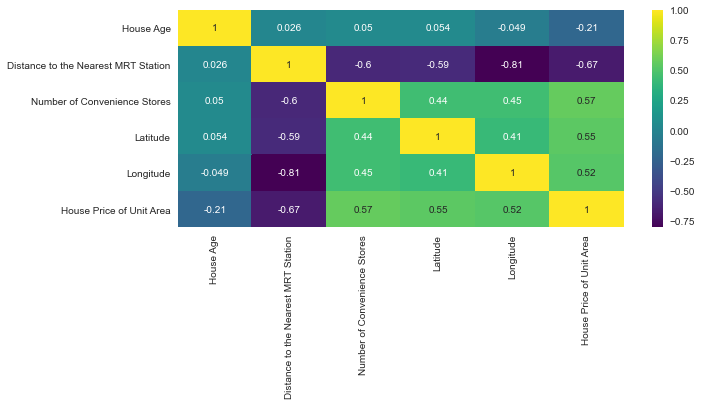

In [17]:
fig = plt.figure(figsize=(10,4))
ax = sns.heatmap(df.corr(),annot=True,cmap = 'viridis')
fig.show()

# Data Plots

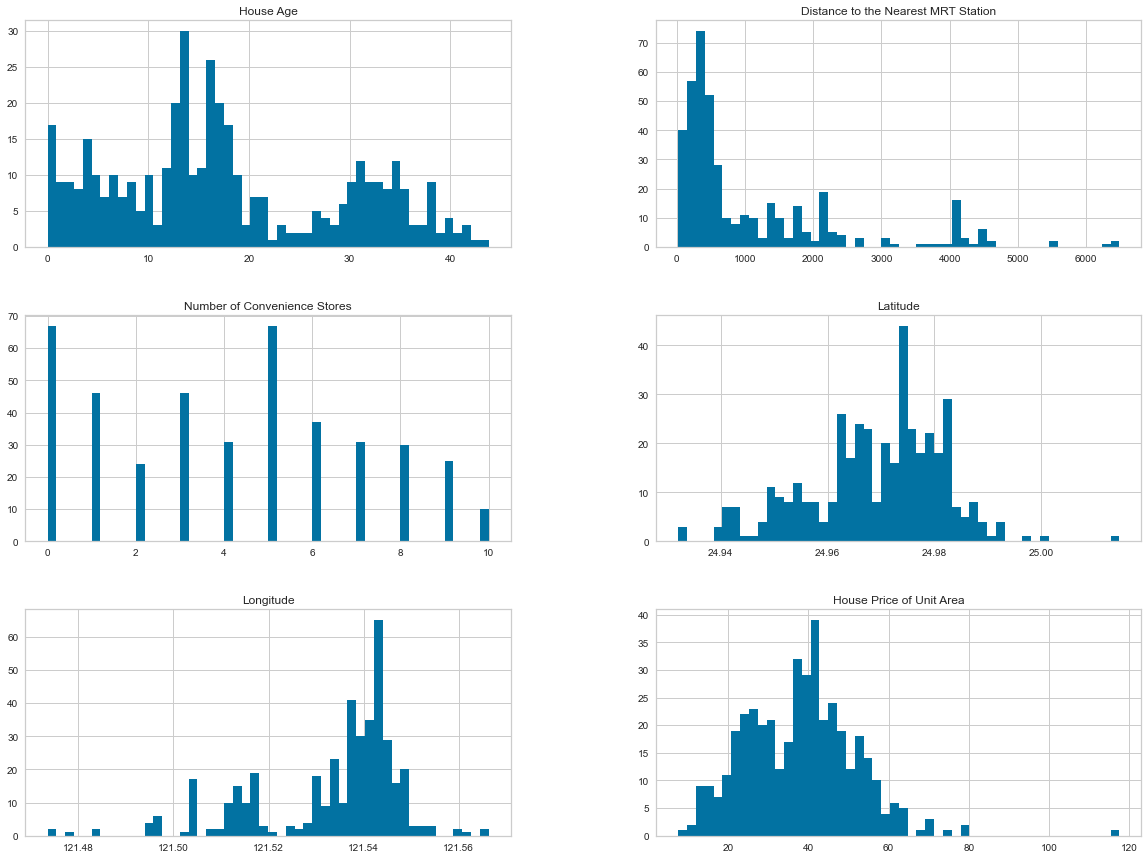

In [18]:
df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='House Age', ylabel='House Price of Unit Area'>

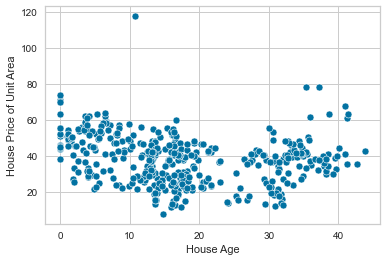

In [19]:
sns.scatterplot(x = 'House Age',y = 'House Price of Unit Area',data = df)

<AxesSubplot:xlabel='Number of Convenience Stores', ylabel='House Price of Unit Area'>

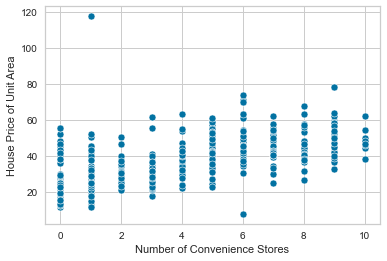

In [20]:
sns.scatterplot(x = 'Number of Convenience Stores',y = 'House Price of Unit Area',data = df)

[Text(0.5, 0, 'Rating'),
 Text(0, 0.5, 'House Price of Unit Area $'),
 Text(0.5, 1.0, 'House Price of Unit Area vs Number of Convenience Stores')]

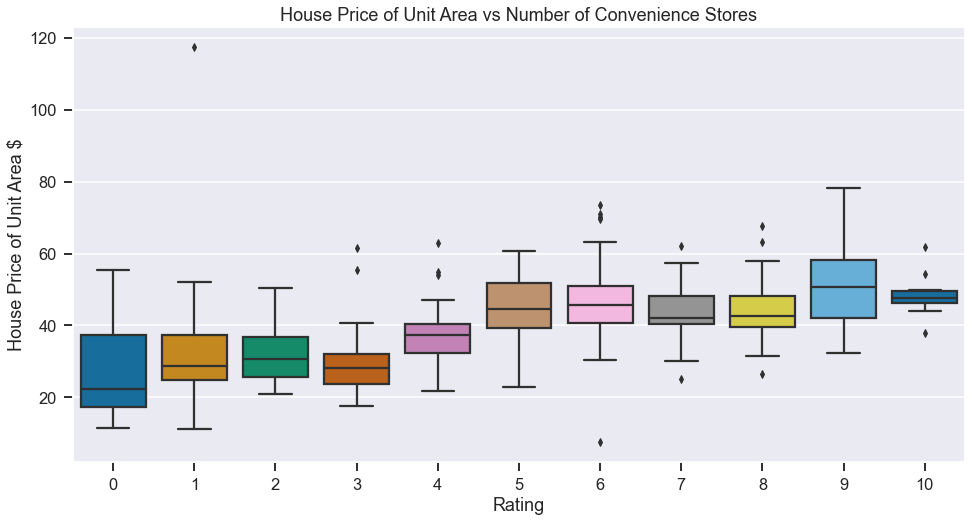

In [21]:
fig = plt.figure(figsize=(16,8))
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
ax=sns.boxplot(y='House Price of Unit Area', x='Number of Convenience Stores',data=df,palette="colorblind")
ax.set(xlabel='Rating', ylabel='House Price of Unit Area $',title='House Price of Unit Area vs Number of Convenience Stores')

# Assigning Variables

In [22]:
#Two-dimensional (pd DataFrame)
X = df[['House Age','Distance to the Nearest MRT Station','Number of Convenience Stores','Latitude']] 
y = df['House Price of Unit Area'] #One-dimensional (pd Series)

In [23]:
X 

,House Age,Distance to the Nearest MRT Station,Number of Convenience Stores,Latitude
0,32.0,84.87882,10,24.98298
1,19.5,306.59470,9,24.98034
2,13.3,561.98450,5,24.98746
3,13.3,561.98450,5,24.98746
4,5.0,390.56840,5,24.97937
...,...,...,...,...
409,13.7,4082.01500,0,24.94155
410,5.6,90.45606,9,24.97433
411,18.8,390.96960,7,24.97923
412,8.1,104.81010,5,24.96674


In [24]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: House Price of Unit Area, Length: 414, dtype: float64

In [25]:
type(y)

pandas.core.series.Series

In [26]:
type(X)

pandas.core.frame.DataFrame

# Spiliting & Standardizing Data

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0,shuffle=True)           

In [28]:
X_train

,House Age,Distance to the Nearest MRT Station,Number of Convenience Stores,Latitude
302,16.5,2288.01100,3,24.95885
20,4.5,2275.87700,3,24.96314
303,38.3,439.71050,0,24.97161
142,19.8,640.60710,5,24.97017
14,13.2,1164.83800,4,24.99156
...,...,...,...,...
323,28.6,197.13380,6,24.97631
192,43.8,57.58945,7,24.96750
117,13.6,4197.34900,0,24.93885
47,35.9,640.73910,3,24.97563


In [29]:
y_train

302    23.2
20     29.3
303    38.4
142    37.5
14     34.3
       ... 
323    42.5
192    42.7
117    13.0
47     61.5
172    58.1
Name: House Price of Unit Area, Length: 331, dtype: float64

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Decison Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error 

In [32]:
reg=DecisionTreeRegressor(max_depth=3,min_samples_leaf=0.13,random_state=0) 
reg.fit(X_train, y_train)
print('Test Accuracy of DecisionTree Regression: ',round(100*reg.score(X_test, y_test),2),'%')
print('')
print('Train Accuracy of DecisionTree Regression:',round(100*reg.score(X_train, y_train),2),'%')
print('')
y_pred=reg.predict(X_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))
print('')
print('Reg_Score :' ,reg.score(X_test, y_test))
print('')
print('R_2: ' ,round(R2(y_test, y_pred),4))
pd.DataFrame({'y_test':y_test,'prediction':y_pred})

Test Accuracy of DecisionTree Regression:  72.06 %

Train Accuracy of DecisionTree Regression: 63.01 %

Mean Squared Error (MSE):  6.967

Reg_Score : 0.7205577344035319

R_2:  0.7206


,y_test,prediction
356,45.3,52.200000
170,14.4,21.338095
224,46.0,45.910417
331,15.6,21.338095
306,50.2,45.910417
...,...,...
308,53.0,45.910417
100,38.2,38.804255
7,46.7,45.910417
22,24.6,21.338095


In [33]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [34]:
from yellowbrick.regressor import prediction_error

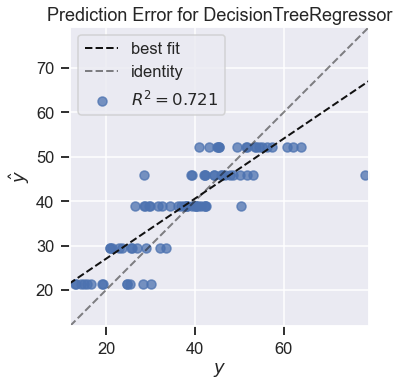

In [36]:
# Instantiate the linear model and visualizer
reg = DecisionTreeRegressor(max_depth=3,min_samples_leaf=0.13,random_state=0)
visualizer = prediction_error(reg, X_train, y_train, X_test, y_test)

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
reg = RandomForestRegressor(max_depth=7,max_features=3)
reg.fit(X_train, y_train)
print('Test Accuracy of Random Forest Regressor Regression: ',round(100*reg.score(X_test, y_test),2),'%')
print('')
print('Train Accuracy of Random Forest Regressor Regression:',round(100*reg.score(X_train, y_train),2),'%')
print('')
y_pred=reg.predict(X_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))
print('')
print('Reg_Score :' ,reg.score(X_test, y_test))
print('')
print('R_2: ' ,round(R2(y_test, y_pred),4))
pd.DataFrame({'y_test':y_test,'prediction':y_pred})

Test Accuracy of Random Forest Regressor Regression:  70.96 %

Train Accuracy of Random Forest Regressor Regression: 91.25 %

Mean Squared Error (MSE):  7.1028

Reg_Score : 0.7095594170701827

R_2:  0.7096


,y_test,prediction
356,45.3,58.704036
170,14.4,17.595068
224,46.0,46.683800
331,15.6,19.184108
306,50.2,34.497650
...,...,...
308,53.0,48.805394
100,38.2,37.980832
7,46.7,48.116772
22,24.6,26.221188


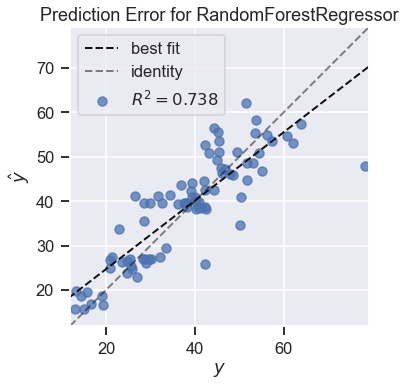

In [39]:
# Instantiate the linear model and visualizer
reg = RandomForestRegressor(max_depth=7,max_features=3)
visualizer = prediction_error(reg, X_train, y_train, X_test, y_test)


# Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as R2

reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) 
reg.fit(X_train, y_train)
print('Test Accuracy of Linear Regression: ',round(100*reg.score(X_test, y_test),2),'%')
print('')
print('Train Accuracy of Linear Regression:',round(100*reg.score(X_train, y_train),2),'%')
print('')
y_pred=reg.predict(X_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))
print('')
print('Reg_Score :' ,reg.score(X_test, y_test))
print('')
print('R_2: ' ,round(R2(y_test, y_pred),4))
pd.DataFrame({'y_test':y_test,'prediction':y_pred})

Test Accuracy of Linear Regression:  64.2 %

Train Accuracy of Linear Regression: 55.45 %

Mean Squared Error (MSE):  7.8854

Reg_Score : 0.6420314016343812

R_2:  0.642


,y_test,prediction
356,45.3,41.374179
170,14.4,12.351547
224,46.0,41.107950
331,15.6,12.164710
306,50.2,40.344080
...,...,...
308,53.0,45.851969
100,38.2,43.242683
7,46.7,45.571676
22,24.6,30.149551


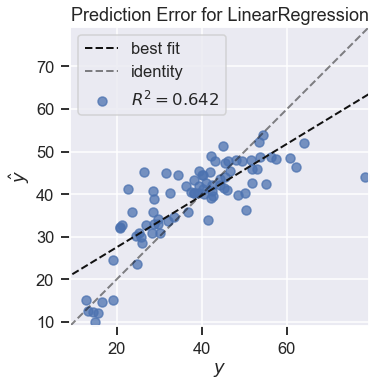

In [42]:
# Instantiate the linear model and visualizer
reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
visualizer = prediction_error(reg, X_train, y_train, X_test, y_test)

# Lasso Regression

In [43]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [44]:
from sklearn.linear_model import Lasso
reg=Lasso()
reg.fit(X_train, y_train)
print('Test Accuracy of Lasso Regression: ',round(100*reg.score(X_test, y_test),2),'%')
print('')
print('Train Accuracy of Lasso Regression:',round(100*reg.score(X_train, y_train),2),'%')
print('')
y_pred=reg.predict(X_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))
print('')
print('Reg_Score :' ,reg.score(X_test, y_test))
print('')
print('R_2: ' ,round(R2(y_test, y_pred),4))
pd.DataFrame({'y_test':y_test,'prediction':y_pred})

Test Accuracy of Lasso Regression:  61.95 %

Train Accuracy of Lasso Regression: 54.12 %

Mean Squared Error (MSE):  8.1295

Reg_Score : 0.619522400618141

R_2:  0.6195


,y_test,prediction
356,45.3,40.957743
170,14.4,15.478304
224,46.0,41.640042
331,15.6,15.391485
306,50.2,40.315565
...,...,...
308,53.0,44.755531
100,38.2,42.231303
7,46.7,44.698103
22,24.6,31.451296


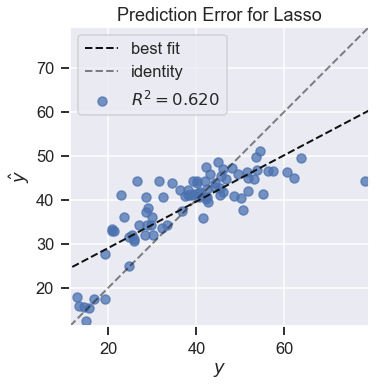

In [45]:
# Instantiate the linear model and visualizer
reg = reg=Lasso()
visualizer = prediction_error(reg, X_train, y_train, X_test, y_test)

# Ridge Regression

In [46]:
reg=Ridge(alpha=0.01)
reg.fit(X_train, y_train)
print('Test Accuracy of Ridge Regression: ',round(100*reg.score(X_test, y_test),2),'%')
print('')
print('Train Accuracy of Ridge Regression:',round(100*reg.score(X_train, y_train),2),'%')
print('')
y_pred=reg.predict(X_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))
print('')
print('Reg_Score :' ,reg.score(X_test, y_test))
print('')
print('R_2: ' ,round(R2(y_test, y_pred),4))
pd.DataFrame({'y_test':y_test,'prediction':y_pred})

Test Accuracy of Ridge Regression:  64.2 %

Train Accuracy of Ridge Regression: 55.45 %

Mean Squared Error (MSE):  7.8854

Reg_Score : 0.6420302686313389

R_2:  0.642


,y_test,prediction
356,45.3,41.374033
170,14.4,12.352013
224,46.0,41.107977
331,15.6,12.165187
306,50.2,40.343959
...,...,...
308,53.0,45.851858
100,38.2,43.242656
7,46.7,45.571591
22,24.6,30.149581


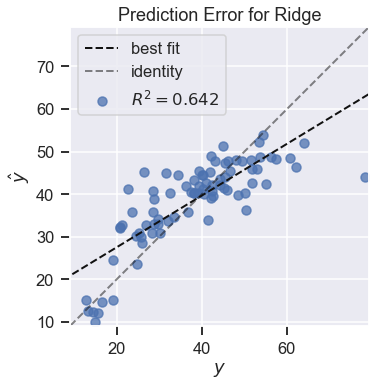

In [47]:
# Instantiate the linear model and visualizer
reg = Ridge(alpha=0.01)
visualizer = prediction_error(reg, X_train, y_train, X_test, y_test)

# Elastic Net

In [48]:
from sklearn.linear_model import ElasticNet
#x_train, x_test, y_train, y_test = train_test_split(x_pca, df['price'], test_size=0.2, random_state=42)
reg=ElasticNet(alpha=0.005)
reg.fit(X_train, y_train)
print('Test Accuracy of ElacticNet Regression: ',round(100*reg.score(X_test, y_test),2),'%')
print('')
print('Train Accuracy of ElacticNet Regression:',round(100*reg.score(X_train, y_train),2),'%')
print('')
y_pred=reg.predict(X_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))
print('')
print('Reg_Score :' ,reg.score(X_test, y_test))
print('')
print('R_2: ' ,round(R2(y_test, y_pred),4))
pd.DataFrame({'y_test':y_test,'prediction':y_pred})

Test Accuracy of ElacticNet Regression:  64.19 %

Train Accuracy of ElacticNet Regression: 55.45 %

Mean Squared Error (MSE):  7.8867

Reg_Score : 0.6419111324719821

R_2:  0.6419


,y_test,prediction
356,45.3,41.361024
170,14.4,12.397909
224,46.0,41.111533
331,15.6,12.212199
306,50.2,40.334074
...,...,...
308,53.0,45.840020
100,38.2,43.237946
7,46.7,45.562464
22,24.6,30.155301


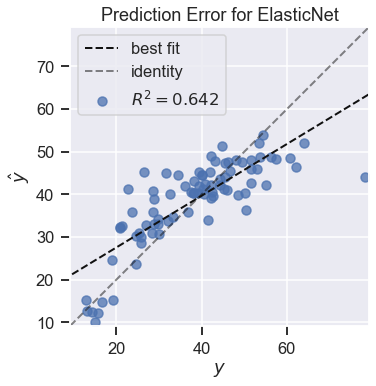

In [50]:
# Instantiate the linear model and visualizer
reg = ElasticNet(alpha=0.005)
visualizer = prediction_error(reg, X_train, y_train, X_test, y_test)

# KNN Regression

In [51]:
from sklearn import neighbors
reg=neighbors.KNeighborsRegressor(n_neighbors = 20)
reg.fit(X_train, y_train)
print('Test Accuracy of KNeighborsRegressor: ',round(100*reg.score(X_test, y_test),2),'%')
print('')
print('Train Accuracy of KNeighborsRegressor:',round(100*reg.score(X_train, y_train),2),'%')
print('')
y_pred=reg.predict(X_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))
print('')
print('Reg_Score :' ,reg.score(X_test, y_test))
print('')
print('R_2: ' ,round(R2(y_test, y_pred),4))
pd.DataFrame({'y_test':y_test,'prediction':y_pred})

Test Accuracy of KNeighborsRegressor:  70.18 %

Train Accuracy of KNeighborsRegressor: 64.86 %

Mean Squared Error (MSE):  7.1972

Reg_Score : 0.7017867146005914

R_2:  0.7018


,y_test,prediction
356,45.3,42.795
170,14.4,18.045
224,46.0,39.425
331,15.6,18.190
306,50.2,40.630
...,...,...
308,53.0,47.775
100,38.2,43.040
7,46.7,47.170
22,24.6,26.295


In [52]:
from sklearn import metrics
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    #er=y_test-pred_i
    error.append(metrics.mean_absolute_error(y_test,pred_i))

Text(0, 0.5, 'Mean Abs Error')

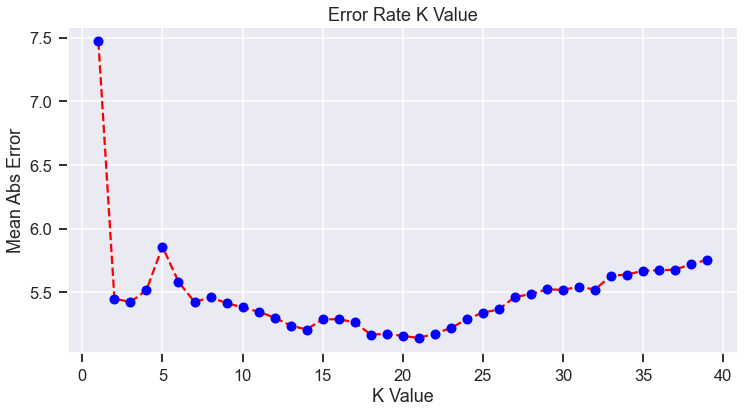

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Abs Error')

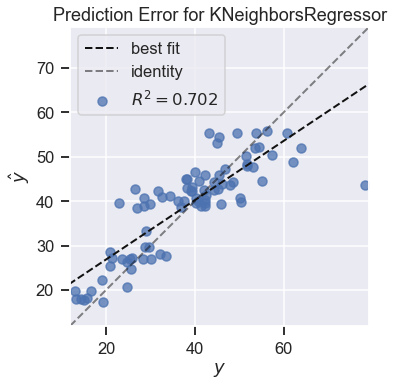

In [53]:
reg = neighbors.KNeighborsRegressor(n_neighbors = 20)
visualizer = prediction_error(reg, X_train, y_train, X_test, y_test)

# Ada Boost

In [54]:
from sklearn.ensemble import AdaBoostRegressor

In [55]:
reg = AdaBoostRegressor(n_estimators=1500, learning_rate = 0.001, loss='exponential')
#ada_model = adaboost_regressor.fit(X_train, y_train)
#reg=RandomForestRegressor(n_estimators=234, min_samples_split= 2, min_samples_leaf= 1, max_features= 'auto',max_depth= 100, bootstrap= True)
reg.fit(X_train, y_train)
print('Test Accuracy of AdaBoostRegressor: ',round(100*reg.score(X_test, y_test),2),'%')
print('')
print('Train Accuracy of AdaBoostRegressor :',round(100*reg.score(X_train, y_train),2),'%')
print('')
y_pred=reg.predict(X_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))
print('')
print('Reg_Score :' ,reg.score(X_test, y_test))
print('')
print('R_2: ' ,round(R2(y_test, y_pred),4))
pd.DataFrame({'y_test':y_test,'prediction':y_pred})

Test Accuracy of AdaBoostRegressor:  74.08 %

Train Accuracy of AdaBoostRegressor : 71.52 %

Mean Squared Error (MSE):  6.7097

Reg_Score : 0.7408151663065223

R_2:  0.7408


,y_test,prediction
356,45.3,51.132857
170,14.4,17.317857
224,46.0,44.842553
331,15.6,17.347619
306,50.2,44.299213
...,...,...
308,53.0,45.606849
100,38.2,38.800000
7,46.7,45.129091
22,24.6,25.691892


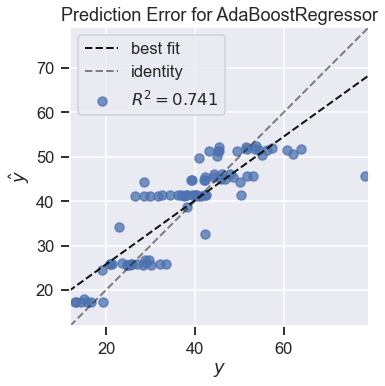

In [57]:
reg=AdaBoostRegressor(n_estimators=1500, learning_rate = 0.001, loss='exponential')
visualizer = prediction_error(reg, X_train, y_train, X_test, y_test)

# Artificial Neural Network (ANN)

In [ ]:
#Note
#Unfortunately ANN did not work on my dataset, although I made tens of attempts.It may be because of system ineffieciency
#For reference work is shown as comment
#MLP is operated to compensate not operating ANN

In [58]:
# Installing required libraries
!pip install tensorflow
!pip install keras

In [59]:
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras.optimizers import Adam
#model=keras.Sequential([keras.layers.Dense(3,activation=tf.nn.relu,input_shape=[5,]),keras.layers.Dense(1)])

In [60]:
#from keras.models import Sequential
#from keras.layers import Dense
#model = Sequential()
#model.add(Dense(30, input_dim=5, activation='relu'))
#model.add(Dense(1))

In [61]:
#model = Sequential()
#model.add(Dense(30, input_dim=3, activation='relu'))
#model.add(Dense(1))
#model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
#model.fit(X_train, y_train, epochs=20, verbose=1)

# Multilayer Perceptrons(MLP)

In [63]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(random_state=0, max_iter=5000)
reg.fit(X_train, y_train)
print('Test Accuracy of MLPRegressor: ',round(100*reg.score(X_test, y_test),2),'%')
print('')
print('Train Accuracy of MLPRegressor :',round(100*reg.score(X_train, y_train),2),'%')
print('')
y_pred=reg.predict(X_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))
reg.score(X_test, y_test)
print('')
print('Reg_Score :' ,reg.score(X_test, y_test))
print('')
print('R_2: ' ,round(R2(y_test, y_pred),4))
pd.DataFrame({'y_test':y_test,'prediction':y_pred})

Test Accuracy of MLPRegressor:  73.06 %

Train Accuracy of MLPRegressor : 73.15 %

Mean Squared Error (MSE):  6.8407

Reg_Score : 0.7305941552509514

R_2:  0.7306


,y_test,prediction
356,45.3,47.511845
170,14.4,18.551662
224,46.0,41.082197
331,15.6,19.012361
306,50.2,44.178452
...,...,...
308,53.0,48.655004
100,38.2,37.548044
7,46.7,45.616565
22,24.6,25.360065


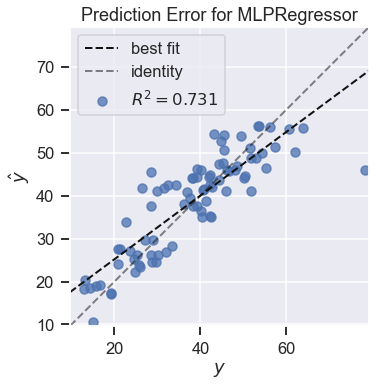

In [64]:
reg=MLPRegressor(random_state=0, max_iter=5000)
visualizer = prediction_error(reg, X_train, y_train, X_test, y_test)

# Support Vector Regression (SVR)

In [78]:
from sklearn.svm import SVR
#reg = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
#reg = SVR(kernel="linear", C=100, gamma="auto")
reg = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1) #Best
reg.fit(X_train, y_train)
print('Test Accuracy of SVR: ',round(100*reg.score(X_test, y_test),2),'%')
print('')
print('Train Accuracy of SVR :',round(100*reg.score(X_train, y_train),2),'%')
print('')
y_pred=reg.predict(X_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))
reg.score(X_test, y_test)
print('')
print('Reg_Score :' ,reg.score(X_test, y_test))
print('')
print('R_2: ' ,round(R2(y_test, y_pred),4))
pd.DataFrame({'y_test':y_test,'prediction':y_pred})

Test Accuracy of SVR:  71.38 %

Train Accuracy of SVR : 69.75 %

Mean Squared Error (MSE):  7.051

Reg_Score : 0.7137787973412947

R_2:  0.7138


,y_test,prediction
356,45.3,43.818257
170,14.4,16.509907
224,46.0,39.928339
331,15.6,17.362585
306,50.2,41.989340
...,...,...
308,53.0,48.339122
100,38.2,36.967879
7,46.7,45.930795
22,24.6,24.796892


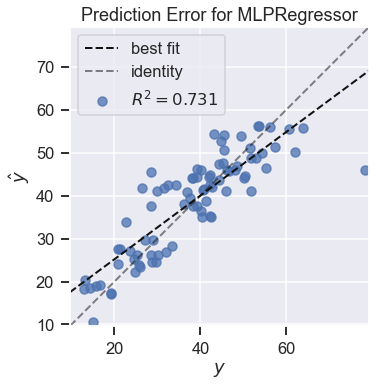

In [79]:
reg=MLPRegressor(random_state=0, max_iter=5000)
visualizer = prediction_error(reg, X_train, y_train, X_test, y_test)

# Model Tuning with RandomizedSearchCV

In [67]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 103, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [68]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [103, 124, 146, 168,
                                                         190, 212, 234, 256,
                                                         278, 300]},
                   random_state=42, verbose=2)

In [69]:
rf_random.best_params_

{'n_estimators': 103,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [71]:
reg=RandomForestRegressor(n_estimators=103, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt',max_depth= 50, bootstrap= True)
reg.fit(X_train, y_train)
print('Test Accuracy of RandomForestRegressor: ',round(100*reg.score(X_test, y_test),2),'%')
print('')
print('Train Accuracy of RandomForestRegressor :',round(100*reg.score(X_train, y_train),2),'%')
print('')
y_pred=reg.predict(X_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))
print('')
print('Reg_Score :' ,reg.score(X_test, y_test))
print('')
print('R_2: ' ,round(R2(y_test, y_pred),4))
pd.DataFrame({'y_test':y_test,'prediction':y_pred})

Test Accuracy of RandomForestRegressor:  74.13 %

Train Accuracy of RandomForestRegressor : 94.6 %

Mean Squared Error (MSE):  6.7033

Reg_Score : 0.7413073388427175

R_2:  0.7413


,y_test,prediction
356,45.3,55.146545
170,14.4,18.038835
224,46.0,47.834951
331,15.6,20.149515
306,50.2,32.168608
...,...,...
308,53.0,47.163528
100,38.2,38.089806
7,46.7,49.246375
22,24.6,26.704919


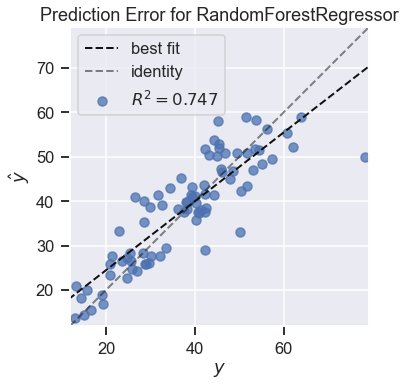

In [72]:
reg=RandomForestRegressor(n_estimators=103, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt',max_depth= 50, bootstrap= True)
visualizer = prediction_error(reg, X_train, y_train, X_test, y_test)

In [ ]:
# The End